## 真的没有理解dataloader里面的操作

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# 定义 transform，包括随机水平翻转、随机裁剪、归一化
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 只需要归一化
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 加载 CIFAR10 数据集
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(testloader):
        inputs, targets = inputs.to(device), targets.to(device)
        if batch_idx == 0:
            whole_test_inputs = inputs
            whole_test_targets = targets
        else:
            whole_test_inputs = torch.cat((whole_test_inputs, inputs), dim=0)
            whole_test_targets = torch.cat((whole_test_targets, targets), dim=0)
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        if batch_idx == 0:
            whole_train_inputs = inputs
            whole_train_targets = targets
        else:
            whole_train_inputs = torch.cat((whole_train_inputs, inputs), dim=0)
            whole_train_targets = torch.cat((whole_train_targets, targets), dim=0)

whole_train_inputs.shape,whole_test_inputs.shape,whole_train_targets.shape,whole_test_targets.shape

(torch.Size([50000, 3, 32, 32]),
 torch.Size([10000, 3, 32, 32]),
 torch.Size([50000]),
 torch.Size([10000]))

In [4]:
whole_train_inputs[1].max(),whole_train_inputs[1].min()

(tensor(0.8824), tensor(-1.))

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from utils import *

In [4]:
train_labels = torch.load('../data/train_labels.pt')
train_data = torch.load('../data/train_data.pt')
test_labels = torch.load('../data/test_labels.pt')
test_data = torch.load('../data/test_data.pt')

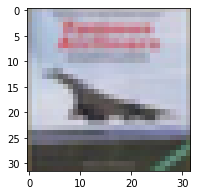

In [12]:
img = test_data.numpy()[3].astype(np.uint8)
show_one_np_data(img)

In [13]:
img.shape

(3, 32, 32)

In [14]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [15]:
img = np.transpose(img, (1, 2, 0))
transform_test(img)

tensor([[[ 0.2157,  0.3098,  0.3804,  ...,  0.5765,  0.5843,  0.5059],
         [ 0.2000,  0.2784,  0.3412,  ...,  0.5843,  0.5922,  0.4824],
         [ 0.2157,  0.2549,  0.3176,  ...,  0.6157,  0.6000,  0.4824],
         ...,
         [-0.3020, -0.5529, -0.5216,  ..., -0.3020, -0.5373, -0.4745],
         [-0.3020, -0.5294, -0.5059,  ..., -0.5529, -0.5216, -0.4118],
         [-0.2784, -0.5294, -0.5216,  ..., -0.5294, -0.4980, -0.4275]],

        [[ 0.2235,  0.3804,  0.4039,  ...,  0.5373,  0.5843,  0.4353],
         [ 0.2157,  0.4039,  0.4431,  ...,  0.6314,  0.6863,  0.4902],
         [ 0.2078,  0.3961,  0.4510,  ...,  0.6314,  0.6863,  0.4980],
         ...,
         [-0.3804, -0.5843, -0.5216,  ..., -0.0667, -0.3804, -0.4196],
         [-0.3569, -0.5451, -0.4824,  ..., -0.4824, -0.4980, -0.4588],
         [-0.3882, -0.5922, -0.5451,  ..., -0.5059, -0.4902, -0.4667]],

        [[ 0.1686,  0.4667,  0.5137,  ...,  0.6392,  0.6627,  0.3412],
         [ 0.2314,  0.6000,  0.6863,  ...,  0